<a href="https://colab.research.google.com/github/Srishti-Ahuja14/AQI-Nagpur/blob/main/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

In [ ]:
import openmeteo_requests

import pandas as pd
import requests_cache
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://air-quality-api.open-meteo.com/v1/air-quality/"
params = {
	"latitude": 21.1463,
	"longitude": 79.0849,
	"hourly": ["pm2_5", "pm10", "sulphur_dioxide", "nitrogen_dioxide", "carbon_monoxide", "ozone", "carbon_dioxide", "aerosol_optical_depth", "dust", "uv_index", "uv_index_clear_sky", "ammonia", "methane", "alder_pollen", "birch_pollen", "grass_pollen", "mugwort_pollen", "olive_pollen", "ragweed_pollen"],
	"current": ["european_aqi", "us_aqi", "pm10", "pm2_5", "carbon_monoxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone", "aerosol_optical_depth", "dust", "uv_index", "uv_index_clear_sky", "ammonia", "alder_pollen", "birch_pollen", "grass_pollen", "mugwort_pollen", "olive_pollen", "ragweed_pollen"],
	"start_date": "2022-08-04",
	"end_date": "2025-11-12",
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates: {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation: {response.Elevation()} m asl")
print(f"Timezone difference to GMT+0: {response.UtcOffsetSeconds()}s")

# Process current data. The order of variables needs to be the same as requested.
current = response.Current()
current_european_aqi = current.Variables(0).Value()
current_us_aqi = current.Variables(1).Value()
current_pm10 = current.Variables(2).Value()
current_pm2_5 = current.Variables(3).Value()
current_carbon_monoxide = current.Variables(4).Value()
current_nitrogen_dioxide = current.Variables(5).Value()
current_sulphur_dioxide = current.Variables(6).Value()
current_ozone = current.Variables(7).Value()
current_aerosol_optical_depth = current.Variables(8).Value()
current_dust = current.Variables(9).Value()
current_uv_index = current.Variables(10).Value()
current_uv_index_clear_sky = current.Variables(11).Value()
current_ammonia = current.Variables(12).Value()
current_alder_pollen = current.Variables(13).Value()
current_birch_pollen = current.Variables(14).Value()
current_grass_pollen = current.Variables(15).Value()
current_mugwort_pollen = current.Variables(16).Value()
current_olive_pollen = current.Variables(17).Value()
current_ragweed_pollen = current.Variables(18).Value()

print(f"\nCurrent time: {current.Time()}")
print(f"Current european_aqi: {current_european_aqi}")
print(f"Current us_aqi: {current_us_aqi}")
print(f"Current pm10: {current_pm10}")
print(f"Current pm2_5: {current_pm2_5}")
print(f"Current carbon_monoxide: {current_carbon_monoxide}")
print(f"Current nitrogen_dioxide: {current_nitrogen_dioxide}")
print(f"Current sulphur_dioxide: {current_sulphur_dioxide}")
print(f"Current ozone: {current_ozone}")
print(f"Current aerosol_optical_depth: {current_aerosol_optical_depth}")
print(f"Current dust: {current_dust}")
print(f"Current uv_index: {current_uv_index}")
print(f"Current uv_index_clear_sky: {current_uv_index_clear_sky}")
print(f"Current ammonia: {current_ammonia}")
print(f"Current alder_pollen: {current_alder_pollen}")
print(f"Current birch_pollen: {current_birch_pollen}")
print(f"Current grass_pollen: {current_grass_pollen}")
print(f"Current mugwort_pollen: {current_mugwort_pollen}")
print(f"Current olive_pollen: {current_olive_pollen}")
print(f"Current ragweed_pollen: {current_ragweed_pollen}")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_pm2_5 = hourly.Variables(0).ValuesAsNumpy()
hourly_pm10 = hourly.Variables(1).ValuesAsNumpy()
hourly_sulphur_dioxide = hourly.Variables(2).ValuesAsNumpy()
hourly_nitrogen_dioxide = hourly.Variables(3).ValuesAsNumpy()
hourly_carbon_monoxide = hourly.Variables(4).ValuesAsNumpy()
hourly_ozone = hourly.Variables(5).ValuesAsNumpy()
hourly_carbon_dioxide = hourly.Variables(6).ValuesAsNumpy()
hourly_aerosol_optical_depth = hourly.Variables(7).ValuesAsNumpy()
hourly_dust = hourly.Variables(8).ValuesAsNumpy()
hourly_uv_index = hourly.Variables(9).ValuesAsNumpy()
hourly_uv_index_clear_sky = hourly.Variables(10).ValuesAsNumpy()
hourly_ammonia = hourly.Variables(11).ValuesAsNumpy()
hourly_methane = hourly.Variables(12).ValuesAsNumpy()
hourly_alder_pollen = hourly.Variables(13).ValuesAsNumpy()
hourly_birch_pollen = hourly.Variables(14).ValuesAsNumpy()
hourly_grass_pollen = hourly.Variables(15).ValuesAsNumpy()
hourly_mugwort_pollen = hourly.Variables(16).ValuesAsNumpy()
hourly_olive_pollen = hourly.Variables(17).ValuesAsNumpy()
hourly_ragweed_pollen = hourly.Variables(18).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end =  pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["pm2_5"] = hourly_pm2_5
hourly_data["pm10"] = hourly_pm10
hourly_data["sulphur_dioxide"] = hourly_sulphur_dioxide
hourly_data["nitrogen_dioxide"] = hourly_nitrogen_dioxide
hourly_data["carbon_monoxide"] = hourly_carbon_monoxide
hourly_data["ozone"] = hourly_ozone
hourly_data["carbon_dioxide"] = hourly_carbon_dioxide
hourly_data["aerosol_optical_depth"] = hourly_aerosol_optical_depth
hourly_data["dust"] = hourly_dust
hourly_data["uv_index"] = hourly_uv_index
hourly_data["uv_index_clear_sky"] = hourly_uv_index_clear_sky
hourly_data["ammonia"] = hourly_ammonia
hourly_data["methane"] = hourly_methane
hourly_data["alder_pollen"] = hourly_alder_pollen
hourly_data["birch_pollen"] = hourly_birch_pollen
hourly_data["grass_pollen"] = hourly_grass_pollen
hourly_data["mugwort_pollen"] = hourly_mugwort_pollen
hourly_data["olive_pollen"] = hourly_olive_pollen
hourly_data["ragweed_pollen"] = hourly_ragweed_pollen

hourly_dataframe = pd.DataFrame(data = hourly_data)
print("\nHourly data\n", hourly_dataframe)

# Save the data to a CSV file
hourly_dataframe.to_csv("nagpur_air_quality.csv", index=False)

# Download it directly
from google.colab import files
files.download("nagpur_air_quality.csv")


Coordinates: 21.099998474121094°N 79.10000610351562°E
Elevation: 315.0 m asl
Timezone difference to GMT+0: 0s

Current time: 1763049600
Current european_aqi: 80.97666931152344
Current us_aqi: 139.30209350585938
Current pm10: 68.0
Current pm2_5: 58.599998474121094
Current carbon_monoxide: 488.0
Current nitrogen_dioxide: 26.399999618530273
Current sulphur_dioxide: 18.700000762939453
Current ozone: 63.0
Current aerosol_optical_depth: 0.36000001430511475
Current dust: 17.0
Current uv_index: 0.0
Current uv_index_clear_sky: 0.0
Current ammonia: nan
Current alder_pollen: nan
Current birch_pollen: nan
Current grass_pollen: nan
Current mugwort_pollen: nan
Current olive_pollen: nan
Current ragweed_pollen: nan

Hourly data
                            date      pm2_5       pm10  sulphur_dioxide  \
0     2022-08-04 00:00:00+00:00  35.700001  51.599998        41.150002   
1     2022-08-04 01:00:00+00:00  26.900000  39.099998        55.200001   
2     2022-08-04 02:00:00+00:00  26.000000  37.799999  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Imports and dataset path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer, label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import os

# If running in Colab, you can upload the file using the left panel or use files.upload()
PATH = 'nagpur_air_quality.csv'  # change if needed
print('Looking for file at', PATH)
df = pd.read_csv(PATH)
print('Loaded dataset shape:', df.shape)
df.head()


Looking for file at nagpur_air_quality.csv
Loaded dataset shape: (28728, 20)


,date,pm2_5,pm10,sulphur_dioxide,nitrogen_dioxide,carbon_monoxide,ozone,carbon_dioxide,aerosol_optical_depth,dust,uv_index,uv_index_clear_sky,ammonia,methane,alder_pollen,birch_pollen,grass_pollen,mugwort_pollen,olive_pollen,ragweed_pollen
0,2022-08-04 00:00:00+00:00,35.7,51.6,41.15,63.10,305.0,9.0,NaN,1.10,2.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-08-04 01:00:00+00:00,26.9,39.1,55.20,61.05,298.0,11.0,NaN,0.90,2.0,0.05,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-08-04 02:00:00+00:00,26.0,37.8,74.95,58.10,288.0,14.0,NaN,0.79,2.0,0.55,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-08-04 03:00:00+00:00,24.4,35.5,91.20,52.70,272.0,22.0,NaN,0.72,2.0,1.25,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-08-04 04:00:00+00:00,27.6,39.8,86.00,47.00,259.0,33.0,NaN,0.71,2.0,1.95,4.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

# Basic info
print(df.info())
print('\nMissing values per column:\n', df.isnull().sum())
print('\nNumeric summary (first few rows):')
display(df.describe().transpose())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28728 entries, 0 to 28727
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   28728 non-null  object 
 1   pm2_5                  28728 non-null  float64
 2   pm10                   28728 non-null  float64
 3   sulphur_dioxide        28728 non-null  float64
 4   nitrogen_dioxide       28728 non-null  float64
 5   carbon_monoxide        28728 non-null  float64
 6   ozone                  28728 non-null  float64
 7   carbon_dioxide         9192 non-null   float64
 8   aerosol_optical_depth  28728 non-null  float64
 9   dust                   28728 non-null  float64
 10  uv_index               28728 non-null  float64
 11  uv_index_clear_sky     28728 non-null  float64
 12  ammonia                0 non-null      float64
 13  methane                9192 non-null   float64
 14  alder_pollen           0 non-null      float64
 15  bi

,count,mean,std,min,25%,50%,75%,max
pm2_5,28728.0,36.881039,23.818328,0.60,20.00,30.70,48.30,182.10
pm10,28728.0,53.591639,34.479586,0.80,29.10,45.40,70.30,260.80
sulphur_dioxide,28728.0,39.908687,47.864058,0.00,13.00,23.60,45.45,490.10
nitrogen_dioxide,28728.0,25.739340,26.639177,0.00,8.20,13.50,33.20,168.50
carbon_monoxide,28728.0,363.306913,206.115710,59.00,228.00,307.00,433.00,1882.00
ozone,28728.0,72.391500,46.213732,-2.00,40.00,65.00,100.00,279.00
carbon_dioxide,9192.0,463.830505,18.923211,429.00,450.00,460.00,474.00,572.00
aerosol_optical_depth,28728.0,0.513312,0.301807,0.03,0.31,0.46,0.64,3.93
dust,28728.0,9.998434,17.994641,0.00,1.00,3.00,11.00,359.00
uv_index,28728.0,1.532555,2.453280,0.00,0.00,0.00,2.45,11.55


In [ ]:

# Create a target label based on pm2_5 quantiles (Low / Medium / High)
# If pm2_5 column is missing, the cell will try pm25 or PM2.5 variants.
possible_names = ['pm2_5','pm2.5','pm25','PM2.5','PM2_5']
pm_col = None
for n in possible_names:
    if n in df.columns:
        pm_col = n
        break
if pm_col is None:
    raise ValueError('No PM2.5-like column found. Please rename your target column to pm2_5 or similar.')

print('Using PM column:', pm_col)
df = df.copy()
df['pm2_5'] = df[pm_col].astype(float)

# create terciles
q1 = df['pm2_5'].quantile(0.33)
q2 = df['pm2_5'].quantile(0.66)
def label_pm(x):
    if x <= q1:
        return 'Low'
    elif x <= q2:
        return 'Medium'
    else:
        return 'High'
df['pollution_level'] = df['pm2_5'].apply(label_pm)

print('Class counts:')
print(df['pollution_level'].value_counts())


Using PM column: pm2_5
Class counts:
pollution_level
High      9746
Low       9524
Medium    9458
Name: count, dtype: int64


In [ ]:
# Select features: numeric columns except the target and date-like columns
exclude = ['pollution_level', 'pm2_5', 'date']
features = [c for c in df.columns if c not in exclude and df[c].dtype in [int, float]]
print('Initially selected numeric features:', features)

X = df[features].copy()
y = df['pollution_level']

# Simple imputation for numeric columns (mean) if missing
X = X.fillna(X.mean())

# Drop columns that are still all NaN (no valid data)
X = X.dropna(axis=1, how='all')

# Print remaining columns
print('Final numeric features used for training:', X.columns.tolist())

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print('Train/Test sizes:', X_train.shape, X_test.shape)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Initially selected numeric features: ['pm10', 'sulphur_dioxide', 'nitrogen_dioxide', 'carbon_monoxide', 'ozone', 'carbon_dioxide', 'aerosol_optical_depth', 'dust', 'uv_index', 'uv_index_clear_sky', 'ammonia', 'methane', 'alder_pollen', 'birch_pollen', 'grass_pollen', 'mugwort_pollen', 'olive_pollen', 'ragweed_pollen']
Final numeric features used for training: ['pm10', 'sulphur_dioxide', 'nitrogen_dioxide', 'carbon_monoxide', 'ozone', 'carbon_dioxide', 'aerosol_optical_depth', 'dust', 'uv_index', 'uv_index_clear_sky', 'methane']
Train/Test sizes: (21546, 11) (7182, 11)


In [ ]:

# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)
acc_gnb = accuracy_score(y_test, y_pred_gnb)
print('GaussianNB accuracy:', acc_gnb)
print('\nClassification report for GaussianNB:\n', classification_report(y_test, y_pred_gnb))

# Train SVM (RBF) with probability estimates
from sklearn.svm import LinearSVC

svm = LinearSVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)
print('Linear SVM accuracy:', acc_svm)
print('\nClassification report for Linear SVM:\n', classification_report(y_test, y_pred_svm))



GaussianNB accuracy: 0.8006126427179059

Classification report for GaussianNB:
               precision    recall  f1-score   support

        High       0.86      0.80      0.83      2437
         Low       0.84      0.88      0.86      2381
      Medium       0.70      0.72      0.71      2364

    accuracy                           0.80      7182
   macro avg       0.80      0.80      0.80      7182
weighted avg       0.80      0.80      0.80      7182

Linear SVM accuracy: 0.8856864383180173

Classification report for Linear SVM:
               precision    recall  f1-score   support

        High       0.88      0.95      0.91      2437
         Low       0.90      0.95      0.93      2381
      Medium       0.88      0.76      0.81      2364

    accuracy                           0.89      7182
   macro avg       0.89      0.88      0.88      7182
weighted avg       0.89      0.89      0.88      7182



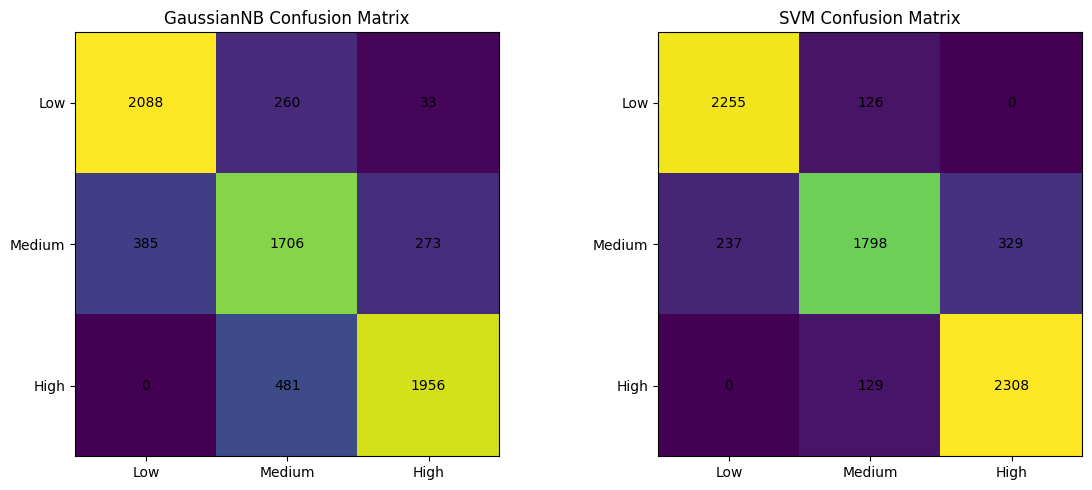

In [ ]:

# Confusion matrices visualization
cm_gnb = confusion_matrix(y_test, y_pred_gnb, labels=['Low','Medium','High'])
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=['Low','Medium','High'])

fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].imshow(cm_gnb, interpolation='nearest')
axes[0].set_title('GaussianNB Confusion Matrix')
axes[0].set_xticks([0,1,2]); axes[0].set_yticks([0,1,2])
axes[0].set_xticklabels(['Low','Medium','High']); axes[0].set_yticklabels(['Low','Medium','High'])
for i in range(cm_gnb.shape[0]):
    for j in range(cm_gnb.shape[1]):
        axes[0].text(j, i, cm_gnb[i,j], ha='center', va='center')

axes[1].imshow(cm_svm, interpolation='nearest')
axes[1].set_title('SVM Confusion Matrix')
axes[1].set_xticks([0,1,2]); axes[1].set_yticks([0,1,2])
axes[1].set_xticklabels(['Low','Medium','High']); axes[1].set_yticklabels(['Low','Medium','High'])
for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        axes[1].text(j, i, cm_svm[i,j], ha='center', va='center')

plt.tight_layout()
plt.show()


Classes (ROC): ['High' 'Low' 'Medium']


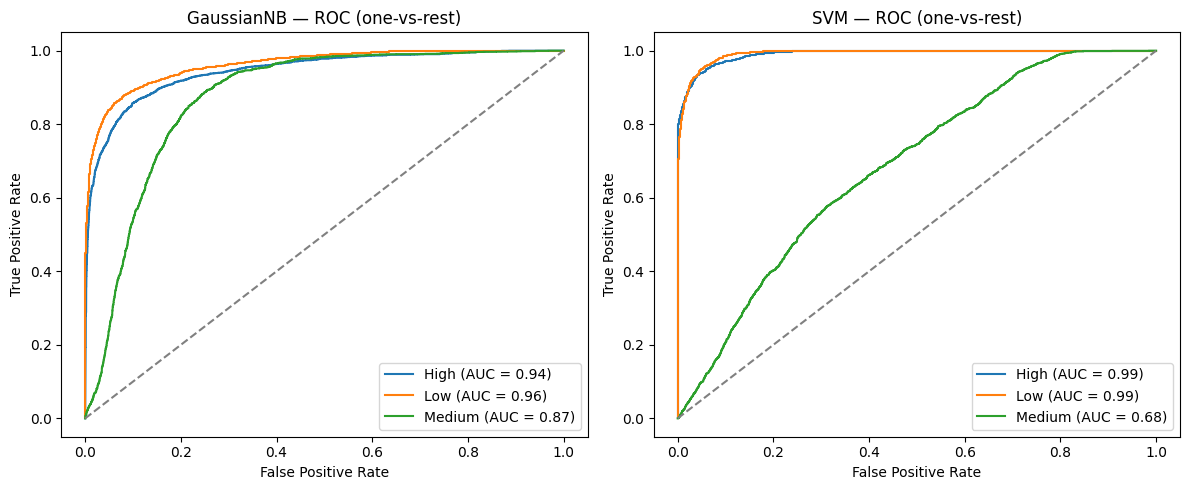

In [ ]:
# ROC curves for multiclass (one-vs-rest)
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

lb = LabelBinarizer()
y_test_b = lb.fit_transform(y_test)
classes = lb.classes_
print('Classes (ROC):', classes)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
models = [(gnb, 'GaussianNB', axes[0]), (svm, 'SVM', axes[1])]

for model, title, ax in models:
    # Try to get probability scores or decision scores
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test_scaled)
        # Ensure correct shape for binary/multiclass handling
        if y_score.ndim == 1:
            y_score = np.vstack([-y_score, y_score]).T
    else:
        ax.text(0.5, 0.5, f'{title} has no score method', ha='center', va='center', fontsize=12)
        ax.axis('off')
        continue

    # Plot ROC for each class
    ax.set_title(title + ' — ROC (one-vs-rest)')
    for j, cls in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_b[:, j], y_score[:, j])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, label=f'{cls} (AUC = {roc_auc:.2f})')

    ax.plot([0, 1], [0, 1], '--', color='gray')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:

# Cross-validation scores (3-fold) on full dataset for a quick comparison
from sklearn.model_selection import cross_val_score
print('Cross-val GaussianNB scoring (accuracy):', cross_val_score(gnb, scaler.transform(X), y, cv=3, scoring='accuracy'))
print('Cross-val SVM scoring (accuracy):', cross_val_score(svm, scaler.transform(X), y, cv=3, scoring='accuracy'))


Cross-val GaussianNB scoring (accuracy): [0.60724728 0.84304511 0.69778613]
Cross-val SVM scoring (accuracy): [0.68473266 0.7835213  0.70227652]


In [ ]:

# (Optional) Save trained models and scaler to files for later use
import joblib
joblib.dump(gnb, 'gnb_model.joblib')
joblib.dump(svm, 'svm_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
print('Saved gnb_model.joblib, svm_model.joblib, scaler.joblib to the working directory.')


Saved gnb_model.joblib, svm_model.joblib, scaler.joblib to the working directory.


In [ ]:
import pandas as pd
import numpy as np

# Create a small synthetic dataset (10 rows) for testing
np.random.seed(42)

new_data = pd.DataFrame({
    'pm10': np.random.uniform(10, 120, 10),
    'sulphur_dioxide': np.random.uniform(5, 80, 10),
    'nitrogen_dioxide': np.random.uniform(5, 60, 10),
    'carbon_monoxide': np.random.uniform(0.2, 3.0, 10),
    'ozone': np.random.uniform(10, 100, 10),
    'carbon_dioxide': np.random.uniform(350, 600, 10),
    'aerosol_optical_depth': np.random.uniform(0.1, 1.0, 10),
    'dust': np.random.uniform(5, 60, 10),
    'uv_index': np.random.uniform(2, 10, 10),
    'uv_index_clear_sky': np.random.uniform(2, 10, 10),
    'methane': np.random.uniform(1.5, 2.5, 10)
})

# Save to CSV
new_data.to_csv('new_air_quality_data.csv', index=False)
print("✅ New test dataset saved as 'new_air_quality_data.csv'")
display(new_data)


✅ New test dataset saved as 'new_air_quality_data.csv'


,pm10,sulphur_dioxide,nitrogen_dioxide,carbon_monoxide,ozone,carbon_dioxide,aerosol_optical_depth,dust,uv_index,uv_index_clear_sky,methane
0,51.199413,6.543837,38.651909,1.901126,20.983441,592.396157,0.449810,47.473462,8.904827,2.956754,1.531429
1,114.578574,77.743239,12.672162,0.677468,54.565922,543.783206,0.344214,15.929362,6.986385,7.705958,2.136410
2,90.519334,67.433198,21.067956,0.382144,13.094967,584.874735,0.845864,5.303716,4.647184,8.086280,1.814356
3,75.852433,20.925433,25.149901,2.856880,91.838836,573.706838,0.421078,49.850379,2.508467,6.490218,2.008571
4,27.162050,18.636873,30.083849,2.903770,33.290198,499.474995,0.352841,43.877154,4.487859,8.167737,2.407566
5,27.159397,18.755338,48.184678,2.463513,69.627006,580.468559,0.588426,45.095394,4.601467,5.950365,1.749292
6,16.389197,27.818168,15.982058,1.052919,38.053997,372.123126,0.226832,47.419869,7.836849,6.181863,1.910383
7,105.279376,44.356732,33.282894,0.473482,56.806122,398.995716,0.821977,9.072456,7.100460,5.420328,2.255551
8,76.122651,37.395876,37.582801,2.115852,59.203925,361.306822,0.167096,24.715615,9.097702,2.203353,1.728798
9,87.887984,26.842186,7.554773,1.432427,26.636901,431.332583,0.988198,11.372798,5.777719,2.863131,1.576980


In [ ]:
import joblib

# Load saved models and scaler
gnb = joblib.load('gnb_model.joblib')
svm = joblib.load('svm_model.joblib')
scaler = joblib.load('scaler.joblib')

# Load the synthetic test dataset
new_data = pd.read_csv('new_air_quality_data.csv')

# Make sure column order matches training
features = new_data.columns.tolist()

# Scale and predict
X_new_scaled = scaler.transform(new_data[features])

pred_gnb = gnb.predict(X_new_scaled)
pred_svm = svm.predict(X_new_scaled)

# Show predictions
results = new_data.copy()
results['Pred_GNB'] = pred_gnb
results['Pred_SVM'] = pred_svm

print("✅ Predictions on new data:")
display(results)


✅ Predictions on new data:


,pm10,sulphur_dioxide,nitrogen_dioxide,carbon_monoxide,ozone,carbon_dioxide,aerosol_optical_depth,dust,uv_index,uv_index_clear_sky,methane,Pred_GNB,Pred_SVM
0,51.199413,6.543837,38.651909,1.901126,20.983441,592.396157,0.449810,47.473462,8.904827,2.956754,1.531429,High,Low
1,114.578574,77.743239,12.672162,0.677468,54.565922,543.783206,0.344214,15.929362,6.986385,7.705958,2.136410,High,Medium
2,90.519334,67.433198,21.067956,0.382144,13.094967,584.874735,0.845864,5.303716,4.647184,8.086280,1.814356,High,Medium
3,75.852433,20.925433,25.149901,2.856880,91.838836,573.706838,0.421078,49.850379,2.508467,6.490218,2.008571,High,Low
4,27.162050,18.636873,30.083849,2.903770,33.290198,499.474995,0.352841,43.877154,4.487859,8.167737,2.407566,Low,Low
5,27.159397,18.755338,48.184678,2.463513,69.627006,580.468559,0.588426,45.095394,4.601467,5.950365,1.749292,High,Low
6,16.389197,27.818168,15.982058,1.052919,38.053997,372.123126,0.226832,47.419869,7.836849,6.181863,1.910383,Low,Low
7,105.279376,44.356732,33.282894,0.473482,56.806122,398.995716,0.821977,9.072456,7.100460,5.420328,2.255551,High,Medium
8,76.122651,37.395876,37.582801,2.115852,59.203925,361.306822,0.167096,24.715615,9.097702,2.203353,1.728798,High,Medium
9,87.887984,26.842186,7.554773,1.432427,26.636901,431.332583,0.988198,11.372798,5.777719,2.863131,1.576980,High,Medium


In [16]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import numpy as np

# For numerical evaluation, convert class labels to numeric codes
y_test_num = y_test.astype('category').cat.codes
y_pred_gnb_num = pd.Series(y_pred_gnb).astype('category').cat.codes
y_pred_svm_num = pd.Series(y_pred_svm).astype('category').cat.codes

# Compute metrics for GaussianNB
acc_gnb = accuracy_score(y_test, y_pred_gnb)
mae_gnb = mean_absolute_error(y_test_num, y_pred_gnb_num)
rmse_gnb = np.sqrt(mean_squared_error(y_test_num, y_pred_gnb_num))

# Compute metrics for SVM
acc_svm = accuracy_score(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test_num, y_pred_svm_num)
rmse_svm = np.sqrt(mean_squared_error(y_test_num, y_pred_svm_num))

print("📊 Model Evaluation Results:")
print(f"Gaussian Naive Bayes  → Accuracy: {acc_gnb:.3f},  MAE: {mae_gnb:.3f},  RMSE: {rmse_gnb:.3f}")
print(f"SVM (RBF Kernel)      → Accuracy: {acc_svm:.3f},  MAE: {mae_svm:.3f},  RMSE: {rmse_svm:.3f}")


📊 Model Evaluation Results:
Gaussian Naive Bayes  → Accuracy: 0.801,  MAE: 0.304,  RMSE: 0.717
SVM (RBF Kernel)      → Accuracy: 0.886,  MAE: 0.178,  RMSE: 0.553
